<a href="https://colab.research.google.com/github/sroshans025/healthriskpredictor/blob/main/airquality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**[Predict Air Quality with Machine Learning](https://www.sciencebuddies.org/science-fair-projects/project-ideas/)**

This notebook was developed by Science Buddies [www.sciencebuddies.org](https://www.sciencebuddies.org/) as part of a science project to allow students to explore and learn about artificial intelligence. For personal use, this notebook can be downloaded and modified with attribution. For all other uses, please see our [Terms and Conditions of Fair Use](https://www.sciencebuddies.org/about/terms-and-conditions-of-fair-use).  

**Troubleshooting tips**
*   Read the written instructions at Science Buddies and the text and comments on this page carefully.
*   If you make changes that break the code, you can download a fresh copy of this notebook and start over.

*   If you are using this notebook for a science project and need help, visit our [Ask an Expert](https://www.sciencebuddies.org/science-fair-projects/ask-an-expert-intro) forum for assistance.

## **How To Use This Notebook**

This notebook contains text fields, like this one, that give you information about the project and instructions.

In [ ]:
# There are also code blocks, like this one.

# The green text in a code block are comments. Comments are descriptions of what the code does.

# The non-green text in a code block is the Python code. Click on the triangle in the top left corner to run this code block.

print("Congratulations, you ran a code block! Try changing the text in the code and running it again.")

Congratulations, you ran a code block! Try changing the text in the code and running it again.


# Importing Libraries

In [ ]:
# Standard Library
import os

# Data Science Libraries
import pandas as pd
import numpy as np

# Plotting Libraries
import matplotlib.pyplot as plt

# Machine Learning Libraries (Scikit-learn)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Deep Learning Libraries (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# 3. Loading the Data into a Pandas DataFrame

Code Block 3A

In [ ]:
# Define the path to the CSV file containing air quality data
csv_path = '/content/drive/MyDrive/Colab Notebooks/Air Quality Prediction/miami5yrs.csv'
# Read the CSV file into a DataFrame using pandas
df = pd.read_csv(csv_path)

# Display the first 5 rows of the DataFrame to check the data
df.head()

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM10,PM25
0,01/01/2021,38,PM2.5,NaN,40-115-9007,AQS,.,7,38
1,02/01/2021,58,PM2.5,NaN,40-115-9007,AQS,.,10,58
2,03/01/2021,49,PM2.5,NaN,40-115-9007,AQS,20,8,49
3,04/01/2021,60,PM2.5,NaN,40-115-9007,AQS,26,22,60
4,05/01/2021,68,PM2.5,NaN,40-115-9007,AQS,26,20,68


# 4. Preprocessing

Code Block 4A

In [ ]:
# Convert the 'Date' column to datetime format and set it as the DataFrame index
df.index = pd.to_datetime(df['Date'])

# Display the first 5 rows of the updated DataFrame to verify the changes
df.head()

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM10,PM25
Date,,,,,,,,,
2021-01-01,01/01/2021,38,PM2.5,NaN,40-115-9007,AQS,.,7,38
2021-02-01,02/01/2021,58,PM2.5,NaN,40-115-9007,AQS,.,10,58
2021-03-01,03/01/2021,49,PM2.5,NaN,40-115-9007,AQS,20,8,49
2021-04-01,04/01/2021,60,PM2.5,NaN,40-115-9007,AQS,26,22,60
2021-05-01,05/01/2021,68,PM2.5,NaN,40-115-9007,AQS,26,20,68


Code Block 4B

<Axes: xlabel='Date'>

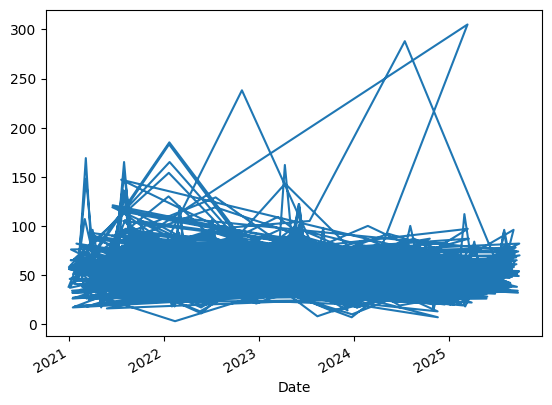

In [ ]:
# Extract the 'Overall AQI Value' column from the DataFrame and store it in a variable 'temp'
temp = df['Overall AQI Value']

# Plot the values in the 'temp' series to visualize the trend of the AQI over time
temp.plot()

Code Block 4C

In [ ]:
# Drop the unnecessary columns
df.drop(columns=['Site Name (of Overall AQI)'], inplace=True)

df.head()

,Date,Overall AQI Value,Main Pollutant,Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM10,PM25
Date,,,,,,,,
2021-01-01,01/01/2021,38,PM2.5,40-115-9007,AQS,.,7,38
2021-02-01,02/01/2021,58,PM2.5,40-115-9007,AQS,.,10,58
2021-03-01,03/01/2021,49,PM2.5,40-115-9007,AQS,20,8,49
2021-04-01,04/01/2021,60,PM2.5,40-115-9007,AQS,26,22,60
2021-05-01,05/01/2021,68,PM2.5,40-115-9007,AQS,26,20,68


Code Block 4D

In [ ]:
# Convert columns to numeric, coercing errors to NaN
df['Ozone'] = pd.to_numeric(df['Ozone'], errors='coerce')
df['PM10'] = pd.to_numeric(df['PM10'], errors='coerce')
df['PM25'] = pd.to_numeric(df['PM25'], errors='coerce')

# Replace '-' with NaN
df.replace('-', np.nan, inplace=True)

# Fill Null values (if any) with last known number
df.ffill(inplace=True)

df.head()

,Date,Overall AQI Value,Main Pollutant,Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM10,PM25
Date,,,,,,,,
2021-01-01,01/01/2021,38,PM2.5,40-115-9007,AQS,NaN,7.0,38.0
2021-02-01,02/01/2021,58,PM2.5,40-115-9007,AQS,NaN,10.0,58.0
2021-03-01,03/01/2021,49,PM2.5,40-115-9007,AQS,20.0,8.0,49.0
2021-04-01,04/01/2021,60,PM2.5,40-115-9007,AQS,26.0,22.0,60.0
2021-05-01,05/01/2021,68,PM2.5,40-115-9007,AQS,26.0,20.0,68.0


Code Block 4E

In [ ]:
def df_to_X_y(df, window_size=5):
    # Convert the input dataframe to a NumPy array for easier manipulation
    df_as_np = df.to_numpy()

    # Initialize empty lists to hold the features (X), labels (y), and indices
    X = []
    y = []
    indices = []

    # Iterate over the length of the dataframe minus the window size
    for i in range(len(df_as_np) - window_size):
        # Extract a 'window' of values from the dataframe (a slice of rows)
        # and format each value as a list (to keep consistent dimensionality)
        row = [[a] for a in df_as_np[i:i + window_size]]

        # Append the windowed rows to the feature list X
        X.append(row)

        # The label (y) is the value that follows the current window
        label = df_as_np[i + window_size]

        # Append the label to the label list y
        y.append(label)

        # Append the starting index of the window to the indices list
        indices.append(df.index[i])

    # Convert the feature (X) and label (y) lists into NumPy arrays and return them along with the indices
    return np.array(X), np.array(y), np.array(indices)

Code Block 4F

In [ ]:
# TODO: Change the window size to reflect how many days in advance we want to predict AQI
WINDOW_SIZE = 365  # Define the size of the sliding window (number of time steps to consider for each sequence)

temp = df['Overall AQI Value']
# X will contain sequences of length 'WINDOW_SIZE', and y will contain the corresponding labels (next values)
X, y, indices = df_to_X_y(temp, WINDOW_SIZE)

# Output the shapes of X and y to check the dimensions
X.shape, y.shape

((1368, 365, 1), (1368,))

## 5. Split to Train, Validation, and Test

Code Block 5A

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X, y, and indices are already defined
indices = np.arange(len(X))  # Create an array of indices (or use the actual indices if available)

# Step 1: Split the dataset into training+validation and test sets, preserving indices
X_train_val, X_test, y_train_val, y_test, indices_train_val, indices_test = train_test_split(
    X, y, indices, test_size=0.2, random_state=42
)

# Step 2: Split the training+validation set into training and validation sets, preserving indices
X_train, X_val, y_train, y_val, indices_train, indices_val = train_test_split(
    X_train_val, y_train_val, indices_train_val, test_size=0.25, random_state=42
)

# Step 3: Scale using only the training data to fit
scaler = MinMaxScaler()

# Reshape X_train, X_val, X_test for scaling
# Scaler expects 2D array (n_samples, n_features)
# Current X_train, X_val, X_test shapes are (num_samples, WINDOW_SIZE, 1)
# Flatten the WINDOW_SIZE and feature dimension for scaling to (total_elements, 1)
X_train_flat = X_train.reshape(-1, 1)
X_val_flat = X_val.reshape(-1, 1)
X_test_flat = X_test.reshape(-1, 1)

# Fit scaler on X_train_flat data and transform all flattened splits
X_train_scaled_flat = scaler.fit_transform(X_train_flat)
X_val_scaled_flat = scaler.transform(X_val_flat)
X_test_scaled_flat = scaler.transform(X_test_flat)

# Reshape back to original 3D shape
X_train_scaled = X_train_scaled_flat.reshape(X_train.shape)
X_val_scaled = X_val_scaled_flat.reshape(X_val.shape)
X_test_scaled = X_test_scaled_flat.reshape(X_test.shape)

# Now you have the features (X), labels (y), and corresponding indices for each split.

Code Block 5B

In [ ]:
# Now, you have:
# X_train, y_train: Training set (60%)
# X_val, y_val: Validation set (20%)
# X_test, y_test: Test set (20%)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (820, 365, 1)
y_train shape: (820,)
X_val shape: (274, 365, 1)
y_val shape: (274,)
X_test shape: (274, 365, 1)
y_test shape: (274,)


# 6. Training the Model

Code Block 6A

In [ ]:
# Create a Sequential model (builds the model layer by layer)
model = Sequential()

# Add an input layer that expects sequences of length WINDOW_SIZE with 1 feature per time step
model.add(InputLayer(input_shape=(WINDOW_SIZE, 1)))

# Add an LSTM layer with 64 units (neurons) to learn patterns from the sequential data
model.add(LSTM(64))

# Add a Dense (fully connected) layer with 8 neurons and ReLU activation to introduce non-linearity
model.add(Dense(8, activation='relu'))

# Add a final Dense layer with 1 neuron and linear activation to produce the predicted output (one value)
model.add(Dense(1, activation='linear'))

# Print a summary of the model's layers and the number of parameters in each layer
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

Code Block 6B

In [ ]:
# Create a ModelCheckpoint callback to save the model to 'model.keras' only when its performance improves
cp = ModelCheckpoint('/content/drive/MyDrive/Air Quality Prediction/model.keras', save_best_only=True)

# Compile the model, specifying the loss function, optimizer, and evaluation metric
# - loss=MeanSquaredError(): Measures how well the model is performing by calculating the average squared difference between predictions and actual values
# - optimizer=Adam(learning_rate=0.001): Adam optimizer adjusts the learning rate during training; here we set the initial learning rate to 0.001
# - metrics=[RootMeanSquaredError()]: The model will evaluate its performance using RMSE, which is a common metric in regression tasks
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

Code Block 6C

In [ ]:
# Train the model using the training data (X_train, y_train)
model.fit(X_train_scaled, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp])

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 195ms/step - loss: 3270.8333 - root_mean_squared_error: 57.1740 - val_loss: 3613.6079 - val_root_mean_squared_error: 60.1133
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 2728.7693 - root_mean_squared_error: 52.1340 - val_loss: 3368.6787 - val_root_mean_squared_error: 58.0403
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - loss: 2045.6827 - root_mean_squared_error: 45.1956 - val_loss: 3192.0603 - val_root_mean_squared_error: 56.4983
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - loss: 1521.6071 - root_mean_squared_error: 38.9853 - val_loss: 3033.9526 - val_root_mean_squared_error: 55.0813
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - loss: 1381.7180 - root_mean_squared_error: 37.0931 - val_loss: 2884.2336 - val_root_mean_squared_error: 53.7051
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - loss: 1045.4702 - root_mean_squared_error: 32.3165 - val_loss: 2747.4275 - val_root_mean_squared_error: 52.415

# 7. Evaluating the Model

Code Block 7A

In [ ]:
# Load the pre-trained model from the specified file path
model = tf.keras.models.load_model('/content/drive/MyDrive/Air Quality Prediction/model.keras')

Code Block 7B

In [ ]:
y_pred = model.predict(X_test_scaled).flatten()

# Set the starting date
# start_date = pd.to_datetime('2019-01-01')
start_date = pd.to_datetime(df.index.min())

# Create a date range that covers the maximum index
max_index = indices_test.max()
date_range = pd.date_range(start=start_date, periods=max_index + 1)

# Use the indices to select corresponding dates from the date range
date_index = date_range[indices_test]

# Example data
data = {'Date': date_index, 'y_test': y_test, 'y_pred': y_pred}
df = pd.DataFrame(data)

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Sort the DataFrame by the index (Date) in ascending order
df.sort_index(ascending=True, inplace=True)

# View the sorted DataFrame
df

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


,y_test,y_pred
Date,,
2021-01-24,60,53.104744
2021-01-30,14,53.103210
2021-02-01,52,53.104706
2021-02-02,57,53.104164
2021-02-13,46,53.105492
...,...,...
2024-09-16,49,53.104259
2024-09-19,46,53.104355
2024-09-22,60,53.103359


Code Block 7C

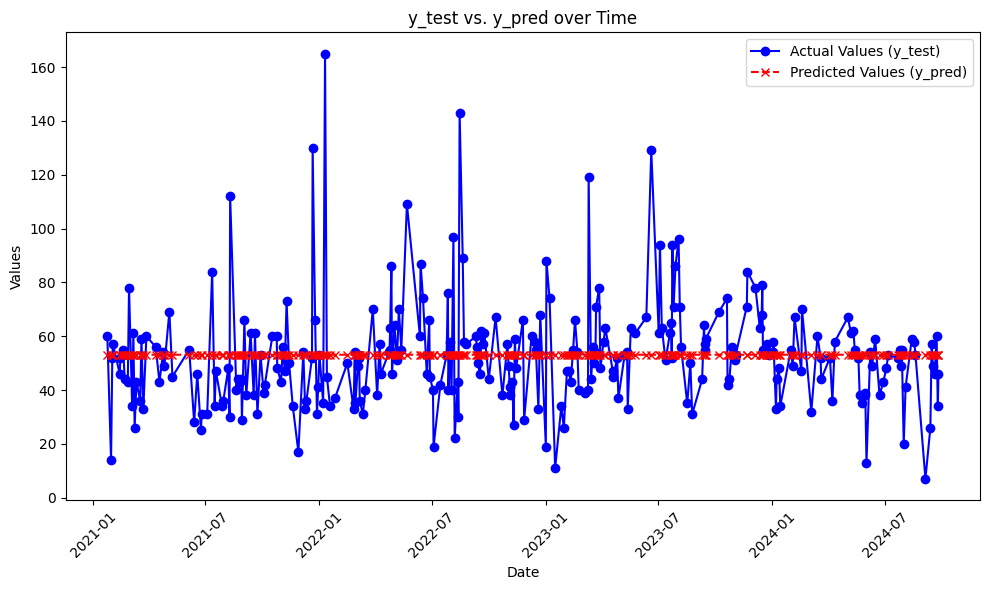

In [ ]:
# Plot the values against the date index
plt.figure(figsize=(10, 6))

# Plot y_test
plt.plot(df.index, df['y_test'], label='Actual Values (y_test)', color='blue', marker='o')

# Plot y_pred
plt.plot(df.index, df['y_pred'], label='Predicted Values (y_pred)', color='red', linestyle='--', marker='x')

# Customize the plot
plt.title('y_test vs. y_pred over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Code Block 7D

In [ ]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 13.657322883605957


Code Block 7E

In [ ]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 396.47918701171875


Code Block 7F

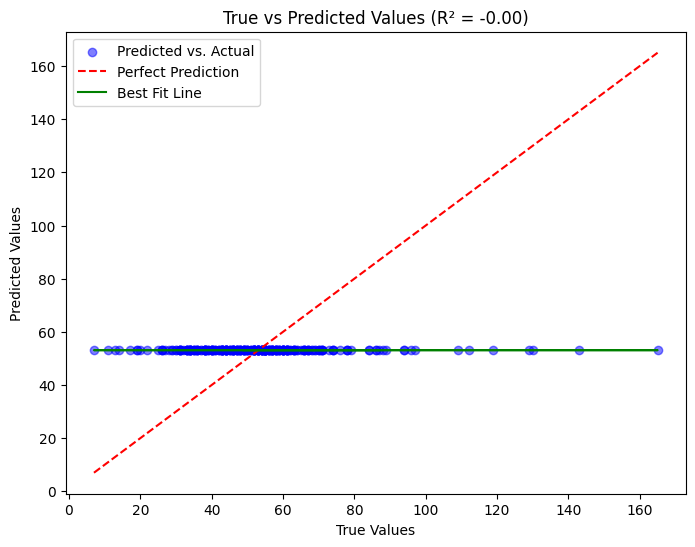

In [ ]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Fit a best-fit line
model = LinearRegression()
y_test_reshaped = np.array(y_test).reshape(-1, 1)  # Reshape for fitting
model.fit(y_test_reshaped, y_pred)
y_best_fit = model.predict(y_test_reshaped)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs. Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction")
plt.plot(y_test, y_best_fit, color='green', linestyle='-', label="Best Fit Line")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f"True vs Predicted Values (R² = {r2:.2f})")
plt.legend()
plt.show()